<a href="https://www.kaggle.com/code/ayoubrayane/notebookfe6d46243a?scriptVersionId=125151443" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix





# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock/Netflix.csv
/kaggle/input/stock/Microsoft.csv
/kaggle/input/stock/Google.csv
/kaggle/input/stock/Amazon.csv
/kaggle/input/stock/Apple.csv


In [2]:
df = pd.read_csv('/kaggle/input/stock/Google.csv')

df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2004-08-19
1,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2004-08-20
2,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2004-08-23
3,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2004-08-24
4,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2004-08-25


In [3]:
df = pd.read_csv('/kaggle/input/stock/Apple.csv')
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,0.936384,1.004464,0.907924,0.999442,0.850643,535796800,2000-01-03
1,0.966518,0.987723,0.903460,0.915179,0.778926,512377600,2000-01-04
2,0.926339,0.987165,0.919643,0.928571,0.790324,778321600,2000-01-05
3,0.947545,0.955357,0.848214,0.848214,0.721931,767972800,2000-01-06
4,0.861607,0.901786,0.852679,0.888393,0.756127,460734400,2000-01-07


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Date
5834,147.809998,153.139999,147.699997,150.470001,150.470001,84457100,2023-03-13
5835,151.279999,153.399994,150.100006,152.589996,152.589996,73695900,2023-03-14
5836,151.190002,153.250000,149.919998,152.990005,152.990005,77167900,2023-03-15
5837,152.160004,156.460007,151.639999,155.850006,155.850006,76161100,2023-03-16
5838,156.080002,156.740005,154.279999,155.000000,155.000000,98862500,2023-03-17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5839 non-null   float64
 1   High       5839 non-null   float64
 2   Low        5839 non-null   float64
 3   Close      5839 non-null   float64
 4   Adj Close  5839 non-null   float64
 5   Volume     5839 non-null   int64  
 6   Date       5839 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 319.4+ KB


#  **QUESTIONS: **
**1- What was the highest closing price of Apple's stock over the entire period covered by the dataset?**

In [6]:
max_closing_price = df['Close'].max()
print("The highest closing price of Apple's stock over the entire period covered by the dataset is:", max_closing_price)

The highest closing price of Apple's stock over the entire period covered by the dataset is: 182.00999450683597


**2- What was the average trading volume of Apple's stock over the entire period covered by the dataset?**

In [7]:
avg_volume = df['Volume'].mean()
print("The average trading volume of Apple's stock over the entire period covered by the dataset is:", avg_volume)

The average trading volume of Apple's stock over the entire period covered by the dataset is: 411287346.6860764


**3- What was the percentage change in the closing price of Apple's stock from the first trading day of the dataset to the last trading day of the dataset?**

In [8]:
first_closing_price = df['Close'].iloc[0]
last_closing_price = df['Close'].iloc[-1]

percentage_change = (last_closing_price - first_closing_price)/(first_closing_price *100)
print('First Closing Price = ', first_closing_price)
print('Last Closing Price = ', last_closing_price)
print("The percentage change in the closing price of Apple's stock from the first trading day of the dataset to the last trading day of the dataset is:", percentage_change, "%")

First Closing Price =  0.9994419813156128
Last Closing Price =  155.0
The percentage change in the closing price of Apple's stock from the first trading day of the dataset to the last trading day of the dataset is: 1.540865411876797 %


**4- What was the average closing price of Apple's stock for each year in the dataset?**

----------------
- Convert the Date column to a datetime object using the pd.to_datetime function
- Create a new column in the DataFrame containing the year of each trading day using the dt.year attribute of the datetime object
- Group the DataFrame by the Year column and calculate the average closing price for each year using the mean function
- Print the result

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
yearly_avg_closing_price = df.groupby('Year')['Close'].mean()
yearly_max_closing_price = df.groupby('Year')['Close'].max()
yearly_min_closing_price = df.groupby('Year')['Close'].min()

yearly_info_closing_price = {
                                'AVG' : yearly_avg_closing_price,
                                'MAX' : yearly_max_closing_price,
                                'MIN' : yearly_min_closing_price
                            }

yearly_info_closing_price_dataframe = pd.DataFrame(yearly_info_closing_price, columns = ['AVG', 'MAX','MIN'])


print("The average closing price of Apple's stock for each year in the dataset is:")
print(yearly_info_closing_price_dataframe)


The average closing price of Apple's stock for each year in the dataset is:
             AVG         MAX         MIN
Year                                    
2000    0.816283    1.287388    0.250000
2001    0.361061    0.474821    0.265625
2002    0.341776    0.466250    0.242679
2003    0.331156    0.443214    0.234286
2004    0.634410    1.222143    0.380000
2005    1.667001    2.677857    1.130179
2006    2.528951    3.278929    1.809643
2007    4.581211    7.136786    2.973929
2008    5.070679    6.961786    2.874643
2009    5.243362    7.558571    2.792857
2010    9.280088   11.623929    6.858929
2011   13.000154   15.080000   11.261429
2012   20.573204   25.075001   14.686786
2013   16.879817   20.360357   13.947500
2014   23.066164   29.750000   17.849285
2015   30.010000   33.250000   25.780001
2016   26.151002   29.562500   22.584999
2017   37.637769   44.105000   29.004999
2018   47.263357   58.017502   36.707500
2019   52.063988   73.412498   35.547501
2020   95.347075  136.

**5- What was the largest single-day percentage gain for Apple's stock in the dataset?**

------------------
- Create a new column in the DataFrame containing the daily percentage change in the closing price using the pct_change function
- Find the row with the largest positive value in the Daily_pct_change column using the max function

The pct_change function is a pandas DataFrame method that calculates the percentage change between the current and a prior element.

In the context of financial data, it can be used to calculate the daily percentage change in a stock price. Specifically, pct_change calculates the percentage change between the current and a prior element by dividing the difference by the prior element, multiplied by 100 to get the percentage value.

In [10]:
df['Daily_pct_change'] = df['Close'].pct_change()
largest_pct_gain = df['Daily_pct_change'].max()

print("The largest single-day percentage gain for Apple's stock in the dataset is:")
print(largest_pct_gain)


The largest single-day percentage gain for Apple's stock in the dataset is:
0.1390494506013631


**6- What was the average daily return for Apple's stock in the dataset?**

--------------------
- Create a new column in the DataFrame containing the daily percentage change in the closing price using the pct_change function
- Calculate the average daily return using the mean function


In [11]:
df['Daily_pct_change'] = df['Close'].pct_change()
avg_daily_return = df['Daily_pct_change'].mean()
print("The average daily return for Apple's stock in the dataset is:")
print(avg_daily_return)


The average daily return for Apple's stock in the dataset is:
0.0011916810110122172


**7- How many times did Apple's stock close higher than the previous day's close in the dataset?**

In [12]:
# The First method
l = df['Daily_pct_change']

df['Higher/prev day'] = df['Daily_pct_change']  > 0
count = sum(map(lambda x : x>0, l))
print("FIRST METHOD : Apple's stock closed higher than the previous day's close", count, "times in the dataset.")


# The Second method
df['Prev_Close'] = df['Close'].shift(1)
df['Higher_Close'] = df['Close'] > df['Prev_Close']
higher_close_count = df['Higher_Close'].sum()
print("SECOND METHOD: Apple's stock closed higher than the previous day's close", higher_close_count, "times in the dataset.")
df.tail()

FIRST METHOD : Apple's stock closed higher than the previous day's close 3035 times in the dataset.
SECOND METHOD: Apple's stock closed higher than the previous day's close 3035 times in the dataset.


,Open,High,Low,Close,Adj Close,Volume,Date,Year,Daily_pct_change,Higher/prev day,Prev_Close,Higher_Close
5834,147.809998,153.139999,147.699997,150.470001,150.470001,84457100,2023-03-13,2023,0.013266,True,148.500000,True
5835,151.279999,153.399994,150.100006,152.589996,152.589996,73695900,2023-03-14,2023,0.014089,True,150.470001,True
5836,151.190002,153.250000,149.919998,152.990005,152.990005,77167900,2023-03-15,2023,0.002621,True,152.589996,True
5837,152.160004,156.460007,151.639999,155.850006,155.850006,76161100,2023-03-16,2023,0.018694,True,152.990005,True
5838,156.080002,156.740005,154.279999,155.000000,155.000000,98862500,2023-03-17,2023,-0.005454,False,155.850006,False


---------------
**8- Is there any correlation between the stock volume and the stock price of Apple? If so, what is the nature of the correlation?**

---------------------
- To do this, we can calculate the correlation coefficient between the 'Volume' and 'Adj Close' columns using the Pandas and NumPy libraries. The correlation coefficient ranges from -1 to 1, where -1 indicates a perfectly negative correlation, 0 indicates no correlation, and 1 indicates a perfectly positive correlation.

- Correlation is a measure of how two variables are related to each other. It tells us whether the variables tend to change together in a similar way, or whether they change in opposite directions. The correlation coefficient is a number that ranges from -1 to 1, and it tells us the strength and direction of the relationship between the two variables.

- A positive correlation means that when one variable goes up, the other variable tends to go up as well. For example, in this case study, we found that there is a positive correlation between the stock volume and the stock price of Apple. This means that when the volume of Apple's stock trading goes up, the stock price tends to go up as well.

- On the other hand, a negative correlation means that when one variable goes up, the other variable tends to go down. For example, if we were looking at the relationship between temperature and snowfall, we might find a negative correlation - when the temperature goes up, the amount of snowfall tends to go down.

- Finally, a correlation coefficient of zero means that there is no relationship between the two variables. This means that changes in one variable do not predict changes in the other variable.

The correlation coefficient between the stock volume and the stock price of Apple is: -0.43


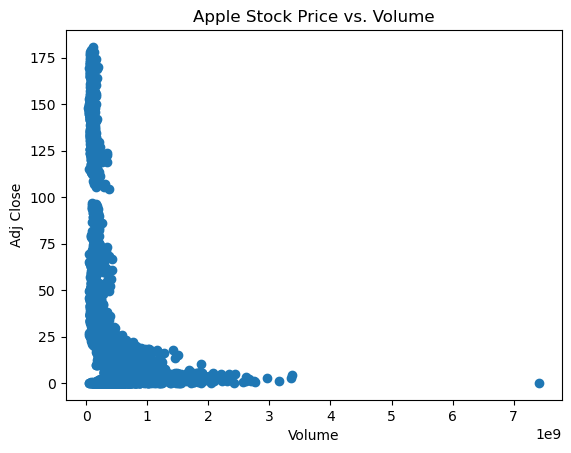

In [13]:


# Calculate the correlation coefficient between the 'Volume' and 'Adj Close' columns
corr = np.corrcoef(df['Volume'], df['Adj Close'])[0,1]

print(f"The correlation coefficient between the stock volume and the stock price of Apple is: {corr:.2f}")

# Plot the data to visualize the relationship
fig, ax = plt.subplots()
ax.scatter(df['Volume'], df['Adj Close'])
ax.set_xlabel('Volume')
ax.set_ylabel('Adj Close')
ax.set_title('Apple Stock Price vs. Volume')
plt.show()


------------
**9- What was the overall trend in the stock price of Apple over the entire time period covered by the dataset? Can you visualize this trend using a line chart?**

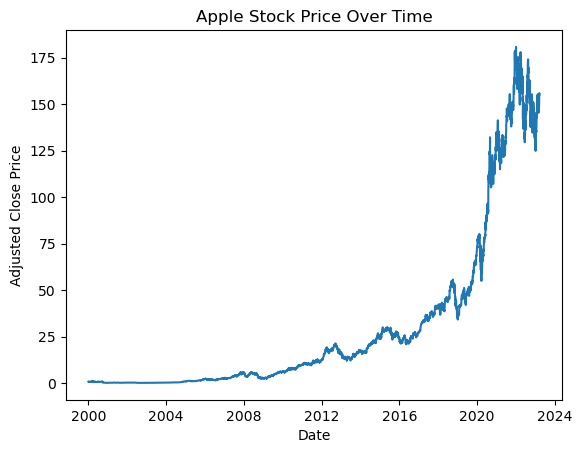

In [14]:
# Create line chart of 'Adj Close' over time
plt.plot(df['Date'], df['Adj Close'])
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

-----------------
**10- How has the stock price of Apple changed over the past five years? What factors might have contributed to these changes? Can you create a line chart and/or a scatter plot to visualize this data**

--------------------
- To analyze the stock price changes of Apple over the past five years, we can filter the dataset to only include data from the last five years, and then plot a line chart and/or scatter plot to visualize the data.

This line of code creates a new DataFrame called last_five_years that includes only the rows of the original DataFrame df where the 'Date' column is greater than or equal to 5 years ago from today's date.

Here's how it works step-by-step:

- **pd.to_datetime('today')** returns the current date and time as a datetime object in the default format 'YYYY-MM-DD HH:MM:SS'.
- **pd.DateOffset(years=5)** creates a DateOffset object representing an offset of 5 years.
- **pd.to_datetime('today') - pd.DateOffset(years=5)** subtracts the 5-year offset from today's date, resulting in a datetime object representing the date and time exactly 5 years ago from today.
- **df[df['Date'] >= pd.to_datetime('today') - pd.DateOffset(years=5)]** creates a new DataFrame called last_five_years that includes only the rows of df where the 'Date' column is greater than or equal to 5 years ago from today's date.

In other words, this line of code filters the original DataFrame to only include data from the last 5 years, based on the 'Date' column.

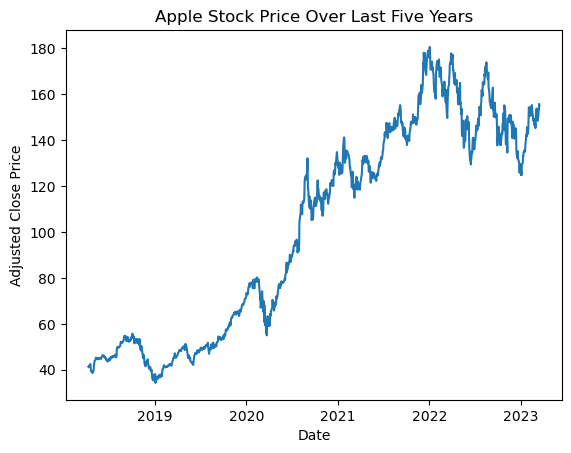

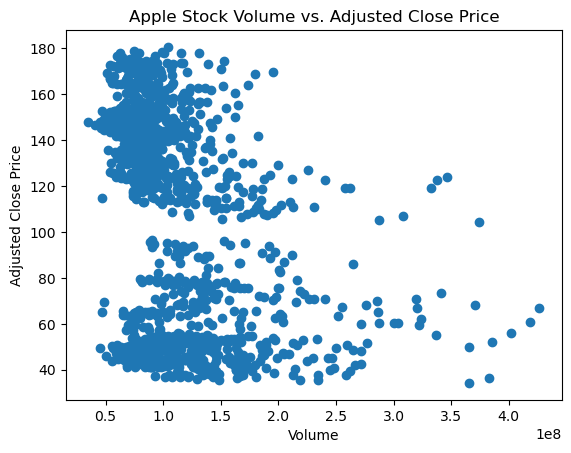

In [15]:
# Filter data to only include last five years
last_five_years = df[df['Date'] >= pd.to_datetime('today') - pd.DateOffset(years=5)]

# Create line chart of 'Adj Close' over time
plt.plot(last_five_years['Date'], last_five_years['Adj Close'])
plt.title('Apple Stock Price Over Last Five Years')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

# Create scatter plot of 'Volume' and 'Adj Close'
plt.scatter(last_five_years['Volume'], last_five_years['Adj Close'])
plt.title('Apple Stock Volume vs. Adjusted Close Price')
plt.xlabel('Volume')
plt.ylabel('Adjusted Close Price')
plt.show()


--------------------------
**11- Are there any patterns or correlations between the trading volume of Apple stock and its price? Can you create a scatter plot to explore this relationship?**

---------
- To explore the relationship between the trading volume and the stock price of Apple, we can create a scatter plot where the x-axis represents the trading volume and the y-axis represents the stock price. We can then visually examine whether there is any pattern or correlation between the two variables.

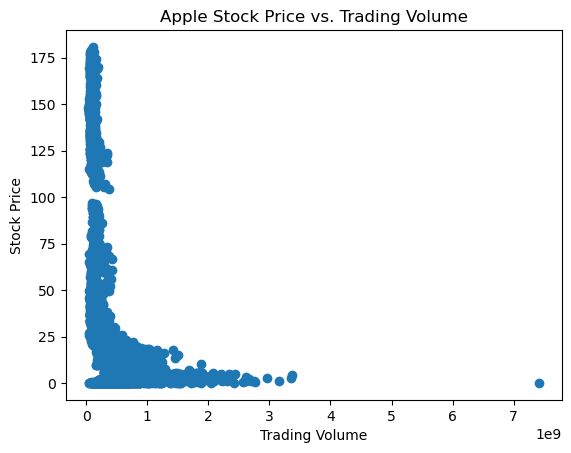

Correlation coefficient between trading volume and stock price: -0.4327577876342299


In [16]:
# Create a scatter plot of trading volume vs. stock price
plt.scatter(df['Volume'], df['Adj Close'])

# Set the title and axis labels
plt.title('Apple Stock Price vs. Trading Volume')
plt.xlabel('Trading Volume')
plt.ylabel('Stock Price')

# Show the plot
plt.show()

# Calculate the correlation coefficient between trading volume and stock price
corr_coef = np.corrcoef(df['Volume'], df['Adj Close'])[0, 1]

print('Correlation coefficient between trading volume and stock price:', corr_coef)

-----------
**12- Has the volatility of Apple's stock price changed over time? Can you calculate and visualize the daily or weekly standard deviation of the stock price over different time periods?**

-------

- Calculate the daily or weekly returns of Apple's stock price. Daily returns can be calculated using the following formula:

**$r_{t} = \frac{AdjClose_t - AdjClose_{t-1}}{AdjClose_{t-1}}$**

Weekly returns can be calculated using the same formula, but with AdjClose_{t-7} instead of AdjClose_{t-1}. You can use the pct_change function in pandas to calculate the daily or weekly returns

- Calculate the daily or weekly standard deviation of the returns. You can use the std function in pandas to calculate the standard deviation

- Calculate the moving average of the daily or weekly standard deviation to visualize changes over time. You can use the rolling function in pandas to calculate the moving average

- Visualize the standard deviation and moving average using a line chart. You can use the matplotlib library in Python to create the chart



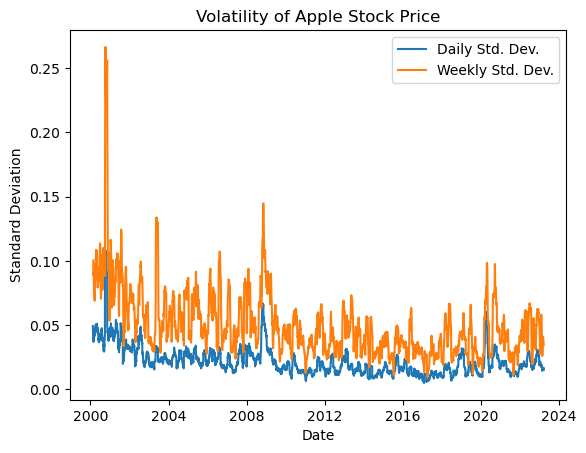

In [17]:
df['daily_returns'] = df['Adj Close'].pct_change()
df['weekly_returns'] = df['Adj Close'].pct_change(periods=7)

daily_std = df['daily_returns'].std()
weekly_std = df['weekly_returns'].std()

daily_std_ma = df['daily_returns'].rolling(window=30).std()
weekly_std_ma = df['weekly_returns'].rolling(window=30).std()


fig, ax = plt.subplots()
ax.plot(df['Date'], daily_std_ma, label='Daily Std. Dev.')
ax.plot(df['Date'], weekly_std_ma, label='Weekly Std. Dev.')
ax.set_xlabel('Date')
ax.set_ylabel('Standard Deviation')
ax.set_title('Volatility of Apple Stock Price')
ax.legend()
plt.show()



# Select the columns you want to print
#cols_to_print = ['daily_returns', 'weekly_returns']

# Print rows 25 to 35 for the selected columns
#(df.loc[200:210, cols_to_print])


-----------
**13- Are there any seasonal patterns in the stock price or trading volume of Apple? Can you group the data by month or quarter and create visualizations to explore this question?**

------
Yes, we can group the data by month or quarter and create visualizations to explore whether there are any seasonal patterns in the stock price or trading volume of Apple.

- To do this in Python, we can first create a new column in our dataframe that contains the month or quarter of each row. We can use the pd.to_datetime() function to convert the Date column to a datetime datatype and then use the .dt.month or .dt.quarter attribute to extract the month or quarter

- Next, we can group the data by month or quarter and calculate the mean stock price and trading volume for each group

- Finally, we can create visualizations using these grouped dataframes. For example, we can create a line chart to visualize the average stock price by month or quarter

- We can also create bar charts to visualize the average trading volume by month or quarter

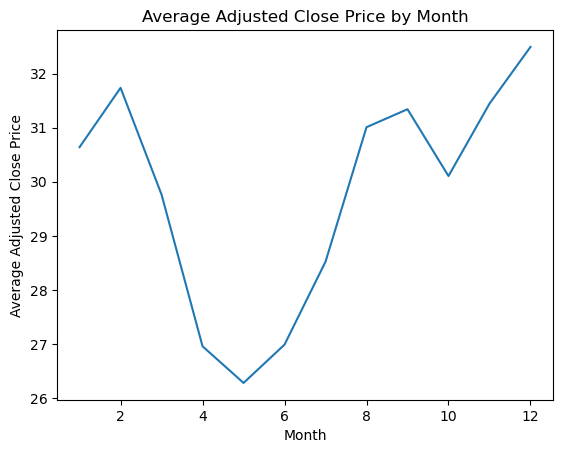

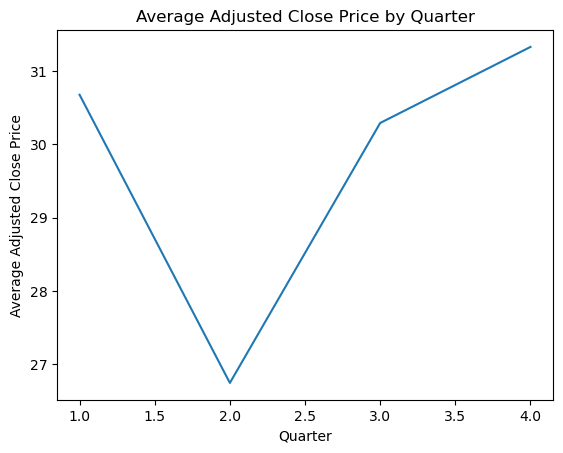

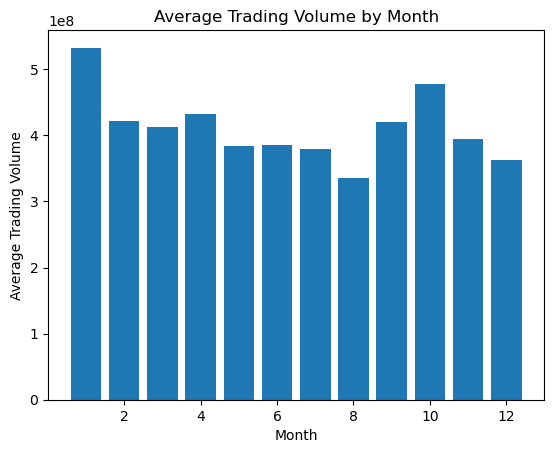

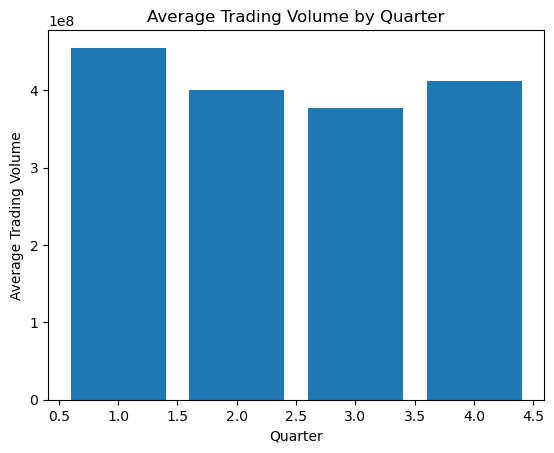

In [18]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Quarter'] = pd.to_datetime(df['Date']).dt.quarter

monthly_data = df.groupby('Month').mean()
quarterly_data = df.groupby('Quarter').mean()


plt.plot(monthly_data.index, monthly_data['Adj Close'])
plt.xlabel('Month')
plt.ylabel('Average Adjusted Close Price')
plt.title('Average Adjusted Close Price by Month')
plt.show()

plt.plot(quarterly_data.index, quarterly_data['Adj Close'])
plt.xlabel('Quarter')
plt.ylabel('Average Adjusted Close Price')
plt.title('Average Adjusted Close Price by Quarter')
plt.show()


plt.bar(monthly_data.index, monthly_data['Volume'])
plt.xlabel('Month')
plt.ylabel('Average Trading Volume')
plt.title('Average Trading Volume by Month')
plt.show()

plt.bar(quarterly_data.index, quarterly_data['Volume'])
plt.xlabel('Quarter')
plt.ylabel('Average Trading Volume')
plt.title('Average Trading Volume by Quarter')
plt.show()



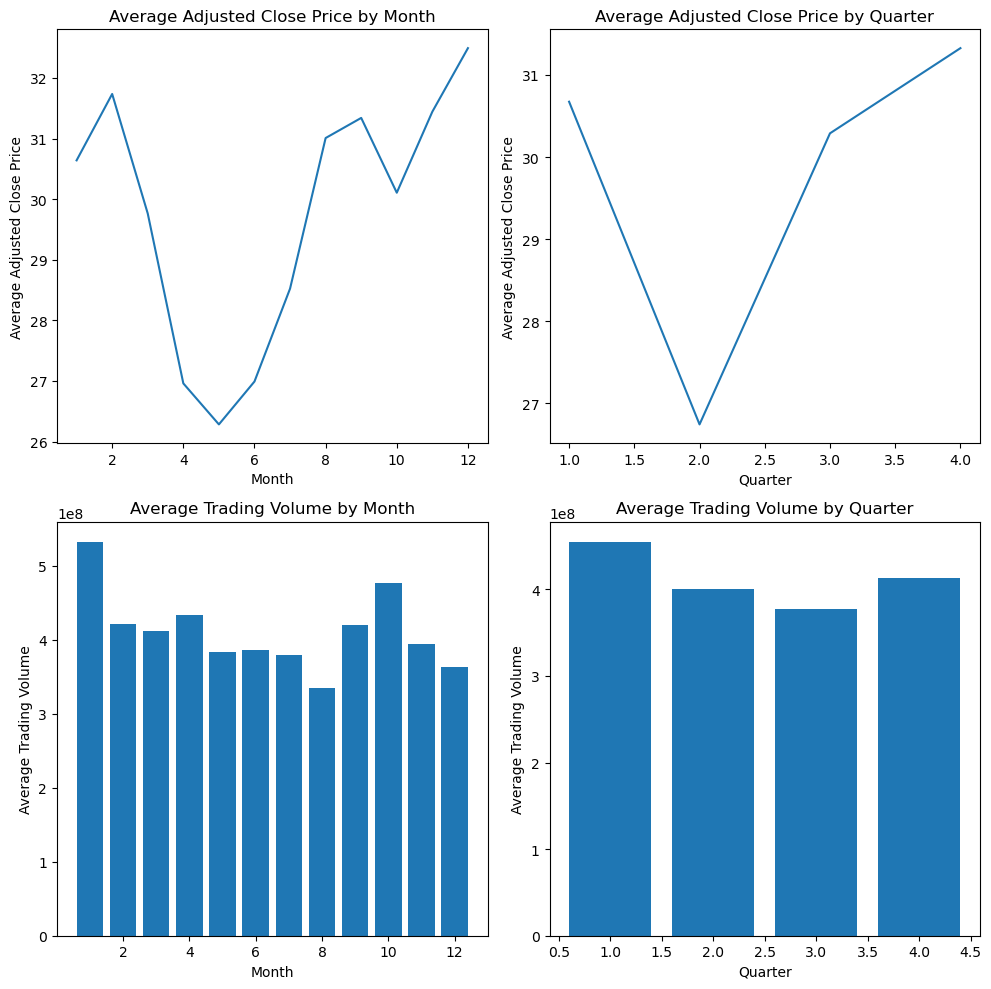

In [19]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Plot the first graph in the top left subplot
axs[0, 0].plot(monthly_data.index, monthly_data['Adj Close'])
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Average Adjusted Close Price')
axs[0, 0].set_title('Average Adjusted Close Price by Month')

# Plot the second graph in the top right subplot
axs[0, 1].plot(quarterly_data.index, quarterly_data['Adj Close'])
axs[0, 1].set_xlabel('Quarter')
axs[0, 1].set_ylabel('Average Adjusted Close Price')
axs[0, 1].set_title('Average Adjusted Close Price by Quarter')

# Plot the third graph in the bottom left subplot
axs[1, 0].bar(monthly_data.index, monthly_data['Volume'])
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Average Trading Volume')
axs[1, 0].set_title('Average Trading Volume by Month')

# Plot the fourth graph in the bottom right subplot
axs[1, 1].bar(quarterly_data.index, quarterly_data['Volume'])
axs[1, 1].set_xlabel('Quarter')
axs[1, 1].set_ylabel('Average Trading Volume')
axs[1, 1].set_title('Average Trading Volume by Quarter')

# Display the subplots
plt.tight_layout()
plt.show()


#  **MACHINE LEARNING: **
**1- Is there a relationship between the opening and closing prices? Can we use one to predict the other?**

-----------

- let's create a new DataFrame with just the opening and closing prices
- Then, let's split the data into training and testing sets
- Next, let's train a linear regression model to predict the closing price based on the opening price
- We can now use the model to make predictions on the testing set
- Finally, we can evaluate the performance of the model using metrics such as mean squared error

Mean squared error: 0.6264670279467698


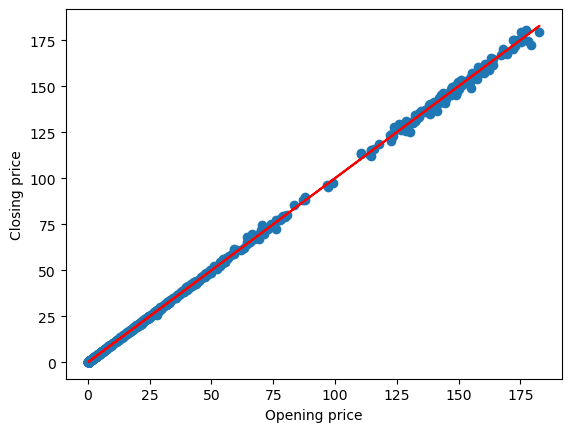

In [20]:
oc_df = df[["Open", "Close"]]

X_train, X_test, y_train, y_test = train_test_split(oc_df["Open"], oc_df["Close"], test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

y_pred = lr.predict(X_test.values.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color="red")
plt.xlabel("Opening price")
plt.ylabel("Closing price")
plt.show()

Coefficients: [1.0009941]
Intercept: -0.007857649638783215
Model accuracy: 0.9996866245099565


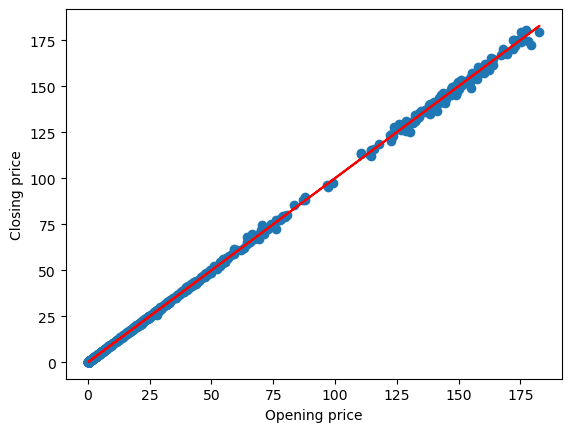

In [21]:
# create X and y variables
X = df[['Open']] # feature variable
y = df['Close'] # target variable

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a linear regression model
lr_model = LinearRegression()

# fit the model on the training data
lr_model.fit(X_train, y_train)

# predict the closing prices for the test data
y_pred = lr_model.predict(X_test)

# print the model's coefficients and intercept
print('Coefficients:', lr_model.coef_)
print('Intercept:', lr_model.intercept_)

# print the model's accuracy
print('Model accuracy:', lr_model.score(X_test, y_test))


plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color="red")
plt.xlabel("Opening price")
plt.ylabel("Closing price")
plt.show()